In [ ]:
!unzip '/content/skin_lesion.zip'

Archive:  /content/skin_lesion.zip
  inflating: __results__.html        
  inflating: __results___files/__results___20_1.png  
  inflating: __results___files/__results___26_0.png  
  inflating: __results___files/__results___29_0.png  
  inflating: __results___files/__results___31_0.png  
  inflating: __results___files/__results___36_0.png  
  inflating: __results___files/__results___38_0.png  
  inflating: __results___files/__results___44_0.png  
  inflating: __results___files/__results___78_0.png  
 extracting: custom.css              
  inflating: model.pkl               


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from PIL import Image

from warnings import filterwarnings

np.random.seed(101)
filterwarnings('ignore')
sns.set_style('darkgrid')

In [ ]:
base_loc = '../input'
image_paths = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join(base_loc, '*', '*.jpg'))}

In [ ]:
df_skin = pd.read_csv(os.path.join(base_loc, '/content/HAM10000_metadata.csv'))
df_skin.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
df_skin['image_path'] = df_skin['image_id'].map(image_paths.get)

In [ ]:
lesion_types = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

df_skin['type'] = df_skin['dx'].map(lesion_types.get)

# Converting the type to the categorical values
df_skin['type_id'] = pd.Categorical(df_skin['type']).codes

df_skin.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path,type,type_id
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,None,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,None,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,None,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,None,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,None,Benign keratosis-like lesions,2


lesion_id           0
image_id            0
dx                  0
dx_type             0
age                57
sex                 0
localization        0
image_path      10015
type                0
type_id             0
dtype: int64


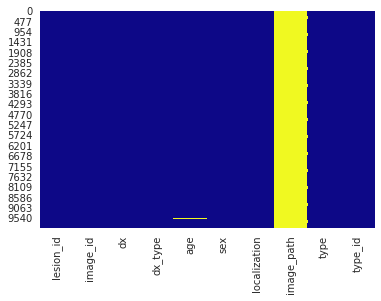

In [ ]:
sns.heatmap(df_skin.isna(), cbar = False, cmap= 'plasma')
print(df_skin.isna().sum())

In [ ]:
print('The % of missing values is only {:.2f} so we will consider filling them with mean valueof the entire column'.format(df_skin['age'].isna().sum()/len(df_skin)*100))
df_skin['age'] = df_skin['age'].fillna(df_skin['age'].mean())
df_skin.head()

The % of missing values is only 0.57 so we will consider filling them with mean valueof the entire column


,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path,type,type_id
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,None,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,None,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,None,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,None,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,None,Benign keratosis-like lesions,2


In [ ]:
df_skin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           10015 non-null  float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   image_path    0 non-null      object 
 8   type          10015 non-null  object 
 9   type_id       10015 non-null  int8   
dtypes: float64(1), int8(1), object(8)
memory usage: 714.1+ KB


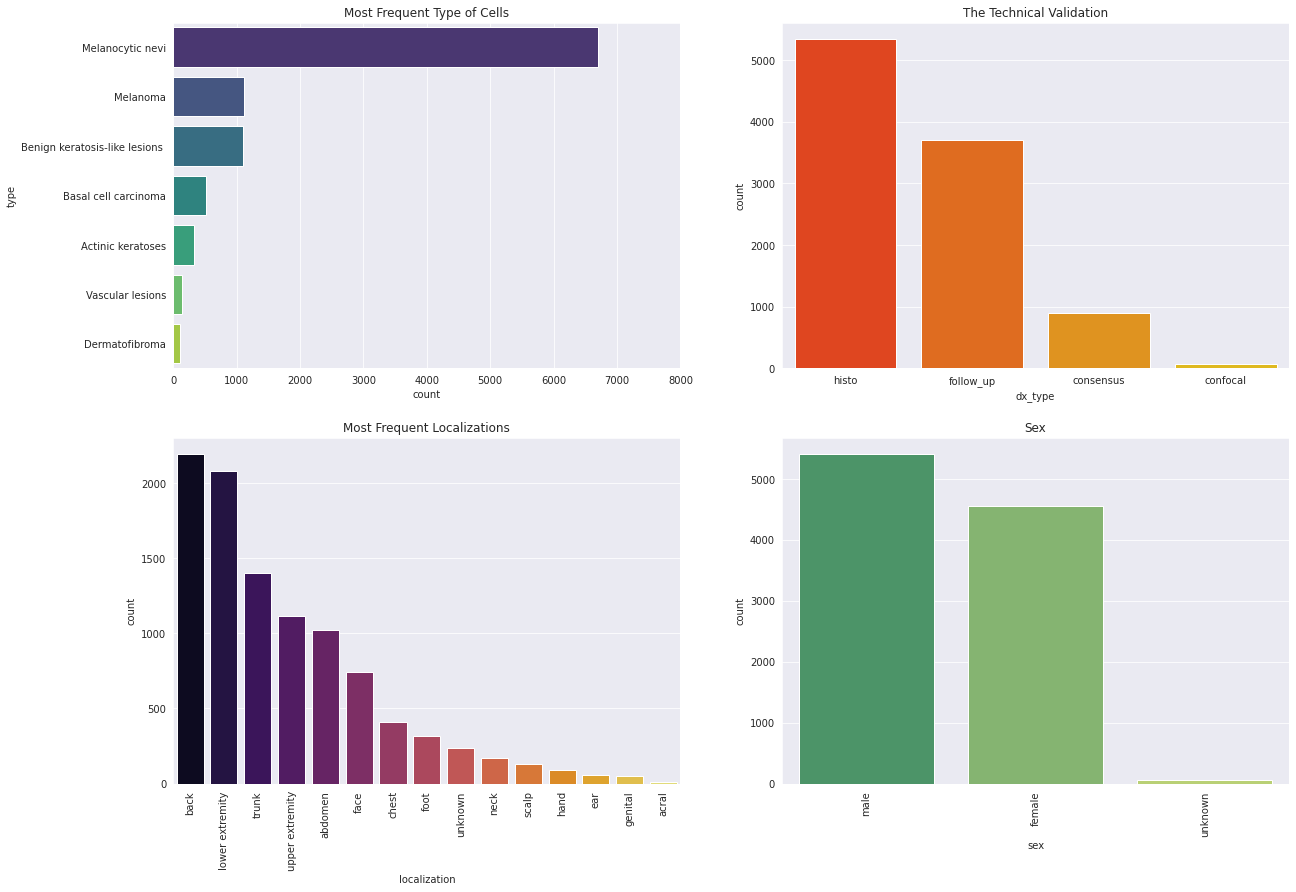

In [ ]:
plt.figure(figsize = (20,14))

plt.subplot(2,2,1)
fig = sns.countplot(y = df_skin['type'], order = df_skin['type'].value_counts().index, palette= 'viridis')
plt.xticks(fig.get_xticks())
plt.title('Most Frequent Type of Cells')

plt.subplot(2,2,2)
fig = sns.countplot(x = df_skin['dx_type'], order = df_skin['dx_type'].value_counts().index, palette= 'autumn')
plt.xticks(fig.get_xticks())
plt.title('The Technical Validation')

plt.subplot(2,2,3)
fig = sns.countplot(x = df_skin['localization'], order = df_skin['localization'].value_counts().index, palette= 'inferno')
plt.xticks(fig.get_xticks(),rotation = 90)
plt.title('Most Frequent Localizations')

plt.subplot(2,2,4)
fig = sns.countplot(x = df_skin['sex'], order = df_skin['sex'].value_counts().index, palette= 'summer')
plt.xticks(fig.get_xticks(),rotation = 90)
plt.title('Sex')

# plt.tight_layout()
plt.show()

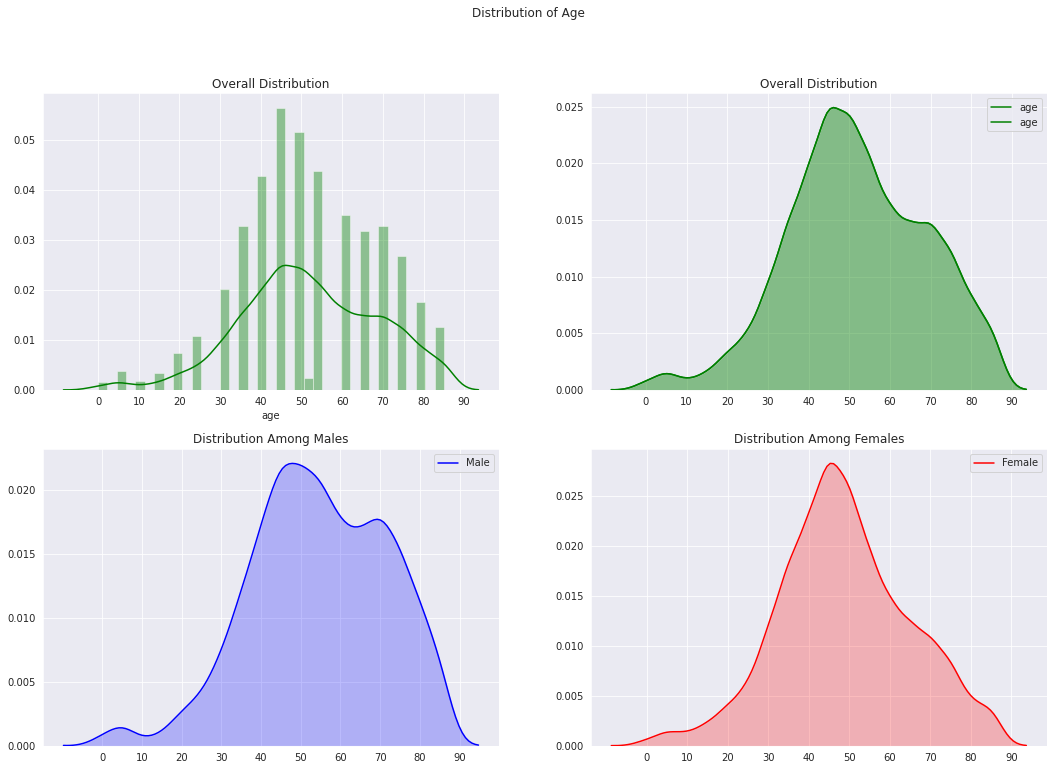

In [ ]:
plt.figure(figsize=(18, 12))
plt.suptitle('Distribution of Age')

plt.subplot(2,2,1)
sns.distplot(df_skin['age'], color= 'green')
plt.title('Overall Distribution')
plt.xticks(list(range(0,100,10)))

plt.subplot(2,2,2)
sns.kdeplot(df_skin['age'], shade = True, color = 'green')
plt.title('Overall Distribution')
plt.xticks(list(range(0,100,10)))

plt.subplot(2,2,2)
sns.kdeplot(df_skin['age'], shade = True, color = 'green')
plt.xticks(list(range(0,100,10)))

plt.subplot(2,2,3)
sns.kdeplot(df_skin[df_skin['sex'] == 'male']['age'],label = 'Male', shade = True, color = 'blue')
plt.xticks(list(range(0,100,10)))
plt.title('Distribution Among Males')

plt.subplot(2,2,4)
sns.kdeplot(df_skin[df_skin['sex'] == 'female']['age'],label = 'Female', shade = True, color = 'red')
plt.title('Distribution Among Females')
plt.xticks(list(range(0,100,10)))


plt.show()

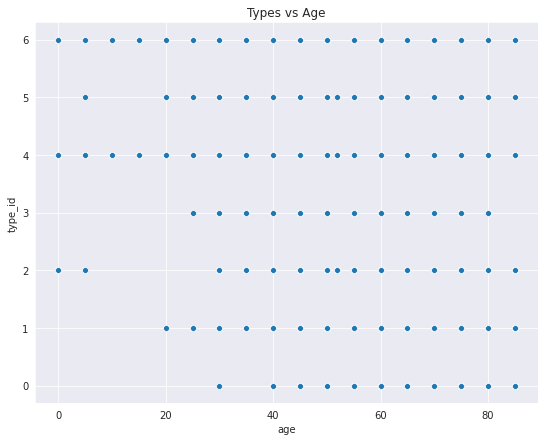

In [ ]:
plt.figure(figsize=(9, 7))
sns.scatterplot(df_skin['age'], df_skin['type_id'])
plt.title('Types vs Age')
plt.show()

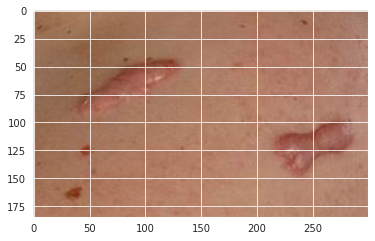

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("/content/images-csv (24)")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [ ]:
import cv2

items = os.listdir('/content')
print(items)
for each_image in items:
 if each_image.endswith(".csv"):
  print(each_image)
full_path = "/content/" + each_image
 
   
image_path = cv2.imread(full_path)


['.config', 'images-csv (39)', 'images-csv (64)', 'images-csv (70)', 'images-csv (63)', 'skin lesion.zip', 'th (26).jpeg', 'th (18).jpeg', 'images-csv (31)', 'th (33).jpeg', 'images-csv (46)', 'th (17).jpeg', 'images-csv (23)', 'images-csv', 'th (24).jpeg', 'th (27).jpeg', 'th (38).jpeg', 'th (23).jpeg', 'images-csv (2)', 'th (29).jpeg', 'th (28).jpeg', 'images-csv (6)', 'th (35).jpeg', 'skin_lesion.zip', 'images-csv (56)', 'images-csv (61)', 'images-csv (16)', 'images-csv (54)', 'images-csv (22)', 'th (19).jpeg', 'images-csv (12)', 'th (37).jpeg', 'th (1).jpeg', 'images-csv (34)', 'images-csv (49)', 'images-csv (44)', 'th (5).jpeg', 'images-csv (51)', 'th (13).jpeg', 'images-csv (37)', 'th (8).jpeg', '.ipynb_checkpoints', 'images-csv (35)', 'th (21).jpeg', 'images-csv (40)', 'images-csv (41)', 'images-csv (7)', 'images-csv (69)', '__results___files', 'images-csv (36)', 'images-csv (17)', 'images-csv (18)', 'th (11).jpeg', 'images-csv (58)', 'images-csv (25)', 'images-csv (19)', 'th (1

['.config', 'images-csv (39)', 'images-csv (64)', 'images-csv (70)', 'images-csv (63)', 'skin lesion.zip', 'th (26).jpeg', 'th (18).jpeg', 'images-csv (31)', 'th (33).jpeg', 'images-csv (46)', 'th (17).jpeg', 'images-csv (23)', 'images-csv', 'th (24).jpeg', 'th (27).jpeg', 'th (38).jpeg', 'th (23).jpeg', 'images-csv (2)', 'th (29).jpeg', 'th (28).jpeg', 'images-csv (6)', 'th (35).jpeg', 'skin_lesion.zip', 'images-csv (56)', 'images-csv (61)', 'images-csv (16)', 'images-csv (54)', 'images-csv (22)', 'th (19).jpeg', 'images-csv (12)', 'th (37).jpeg', 'th (1).jpeg', 'images-csv (34)', 'images-csv (49)', 'images-csv (44)', 'th (5).jpeg', 'images-csv (51)', 'th (13).jpeg', 'images-csv (37)', 'th (8).jpeg', '.ipynb_checkpoints', 'images-csv (35)', 'th (21).jpeg', 'images-csv (40)', 'images-csv (41)', 'images-csv (7)', 'images-csv (69)', '__results___files', 'images-csv (36)', 'images-csv (17)', 'images-csv (18)', 'th (11).jpeg', 'images-csv (58)', 'images-csv (25)', 'images-csv (19)', 'th (1

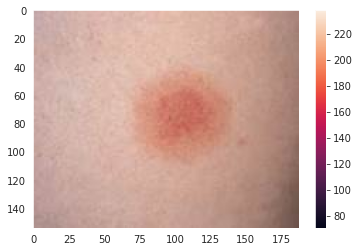

In [ ]:
import matplotlib.pyplot as plt
import os
import cv2
items = os.listdir('/content')
print (items)    

for each_image in items:
  if each_image.endswith(".jpeg"):
    print (each_image)
    full_path ='/content/th (10).jpeg' 
    print (full_path)
    image = cv2.imread(full_path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(image)
plt.colorbar()
plt.grid(False)

In [ ]:
print(image)

None


In [ ]:
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(features, target, test_size = 0.20, random_state = 101)


In [ ]:
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [ ]:
y_train = to_categorical(y_train_, num_classes= 7)
y_test = to_categorical(y_test_, num_classes= 7)

In [ ]:
y_test[:10]


array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'Same', input_shape = (75, 100, 3)))
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'Same'))
model.add(MaxPool2D(pool_size= (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'Same'))
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'Same'))
model.add(MaxPool2D(pool_size= (2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation= 'softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 75, 100, 32)       896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 100, 32)       9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 50, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 50, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 25, 64)       